In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [28]:
df = pd.read_csv("cardiovascular.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


ถ้าเราสังเกตจะเห้นได้ว่า ค่าต่ำสุดของส่วนสูงอยู่ที่ 55 cm และมีน้ำหนักแค่ 10 kg ข้อมูลอาจจะผิดพลาดเนื่องจาก อายุขั้นต่ำคือ 10798 เท่ากับ 29 ปี ซึ่งข้อมูลมันไม่สมเหตุสมผลกัน ดังนั้นเราจึงต้องลบข้อมุลส่วนที่ผิดพลาดนี้ออก

In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63866 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63866 non-null  int64  
 1   age          63866 non-null  int64  
 2   gender       63866 non-null  int64  
 3   height       63866 non-null  int64  
 4   weight       63866 non-null  float64
 5   ap_hi        63866 non-null  int64  
 6   ap_lo        63866 non-null  int64  
 7   cholesterol  63866 non-null  int64  
 8   gluc         63866 non-null  int64  
 9   smoke        63866 non-null  int64  
 10  alco         63866 non-null  int64  
 11  active       63866 non-null  int64  
 12  cardio       63866 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


เราควรคำนวณอายุออกมาเป็นตัวเลขปี เพื่อง่ายต่อการวิเคาะห์ข้อมูล

In [7]:
df['year'] = (df['age']/365).astype(int)

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


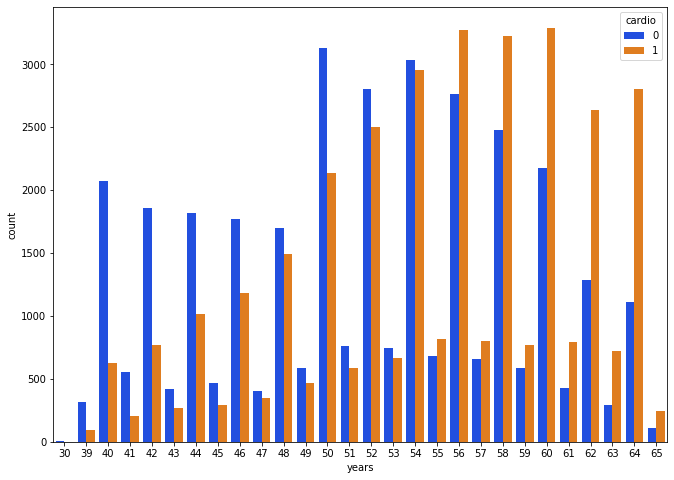

In [29]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="bright");

In [10]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'year',
       'years'],
      dtype='object')

<AxesSubplot:xlabel='variable', ylabel='count'>

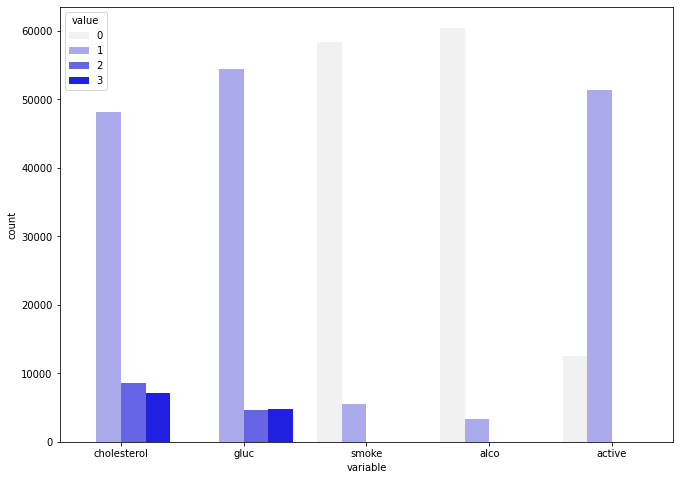

In [11]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), color="blue")

<AxesSubplot:xlabel='variable', ylabel='count'>

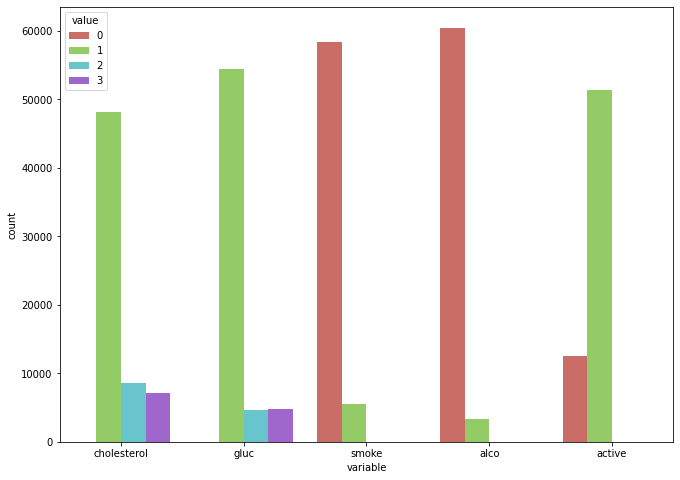

In [12]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical), palette="hls")

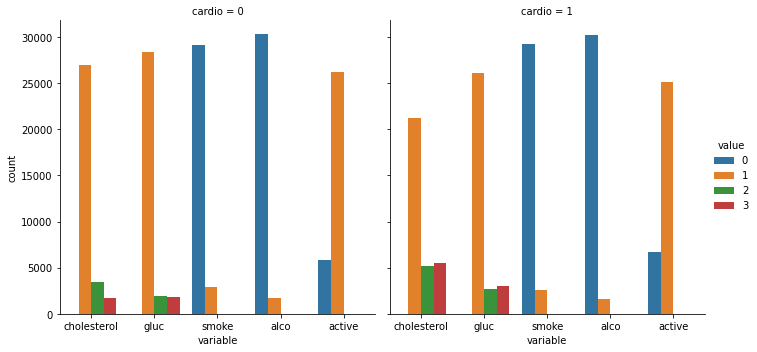

In [13]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

In [14]:
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,years
52969,75556,14703,2,165,65.0,120,80,1,1,0,0,0,1,40,40
20218,28859,19756,1,156,68.0,110,70,2,1,0,1,0,0,54,54
29208,41734,23222,2,171,75.0,150,90,1,1,0,0,1,1,63,64
36409,52002,20339,2,165,59.0,150,100,3,1,0,0,0,1,55,56
64811,92506,18832,2,169,69.0,140,89,1,1,0,0,1,0,51,52
51491,73442,21833,2,167,65.0,120,80,1,1,0,0,1,0,59,60
27746,39667,23455,2,163,72.0,120,80,1,1,0,0,0,1,64,64
41266,58969,19691,1,168,73.0,120,80,1,1,0,0,0,0,53,54
47456,67771,16589,2,169,58.0,120,80,1,1,1,0,1,0,45,45
54714,78062,18374,2,171,76.0,120,80,1,1,1,0,1,0,50,50


In [15]:
df.groupby('gender')['height'].mean()

gender
1    161.962380
2    169.252285
Name: height, dtype: float64

In [16]:
df['gender'].value_counts()

1    41653
2    22213
Name: gender, dtype: int64

In [17]:
df.groupby('gender')['alco'].sum()

gender
1    1050
2    2327
Name: alco, dtype: int64

In [18]:
df['cardio'].value_counts(normalize=True)

0    0.501801
1    0.498199
Name: cardio, dtype: float64

In [19]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327937,0.173864
1,0.324257,0.173942


เราจะเห็นได้ว่า ระดับน้ำตาลในเลือด และ cholesterol มีผลกระทบอย่างมีนัยสำคัญที่อาจที่ให้เกิดโรคหัวใจ

C:\Users\User\AppData\Local\Temp\ipykernel_18788\2622105834.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


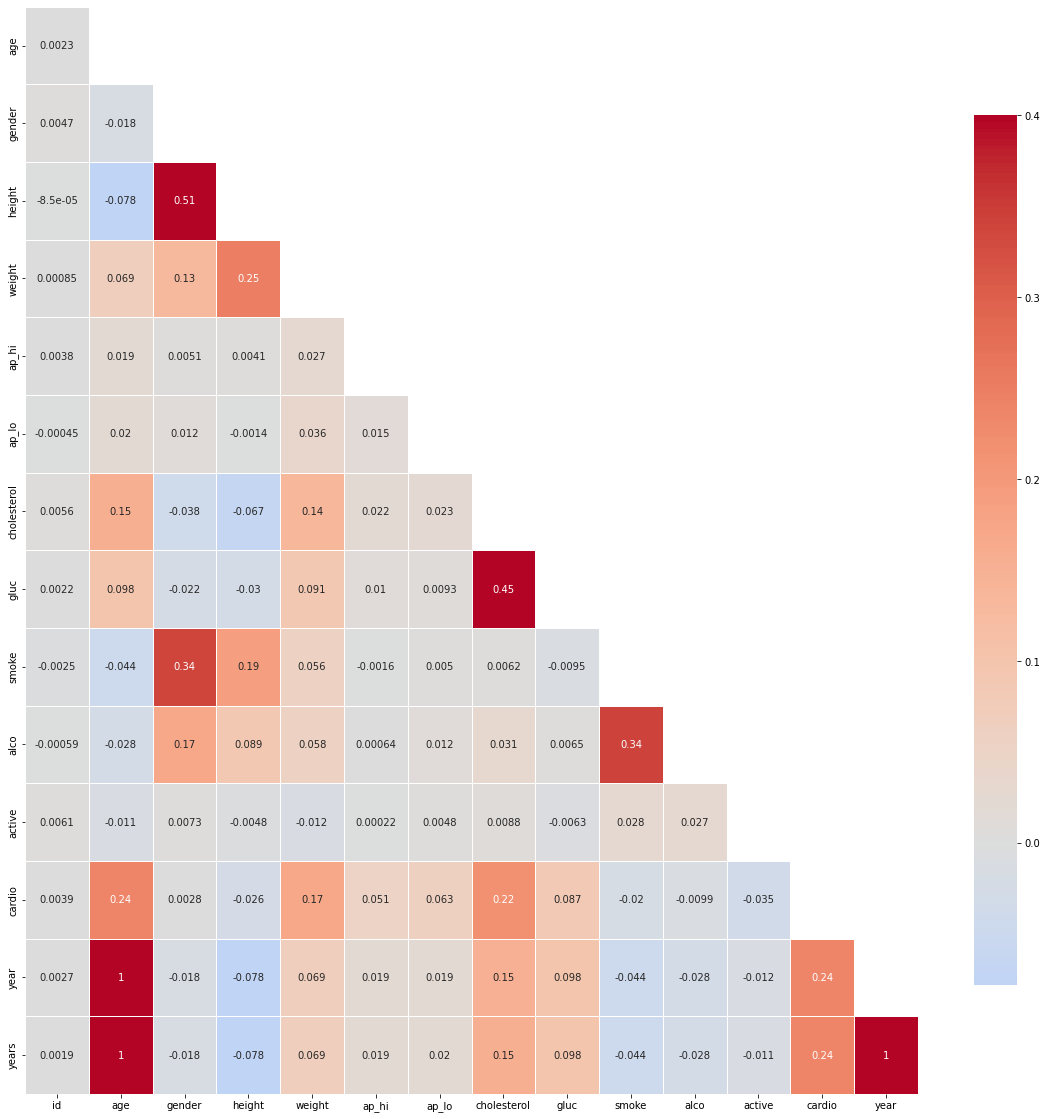

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df.corr().iloc[1:,:-1].copy()

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.4, center=0,annot = True,
              linewidths=.5, cbar_kws={"shrink": .8});

เมื่อเรามีข้อมูลน้ำหนักส่วนสูงแล้ว เราควรสร้างคุณสมบัติ ดัชนีมวลกาย(BMI):Body Mass Index เพิ่ม
BMI = mass(kg) / height(m)^2

In [21]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['BMI'] = df['BMI'].round(decimals= 2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,50,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,55,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,52,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,48,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,48,23.01


โดยค่า BMI ปกติสำหรับคนทั่วไปจะอยู่ที่ 18.5 ถึง 22.9 
เพื่อที่เราจะใช้ข้อมูลมาเปรียบเทียบ ค่าBMIสำหรับคนที่มีสุขภาพดี กับ BMI ของผู้ป่วย 

จาก Pie chart จะเห็นได้ว่าผู้ป่วยส่วนใหญ่มีค่า BMI ที่ผิดปกติ ดังนั้น เราจึงควรตรวจดูว่าค่า BMI ที่ผิดปกติส่งผลให้เกิด CDV มากน้อยเพียงใด 

<AxesSubplot:ylabel='State'>

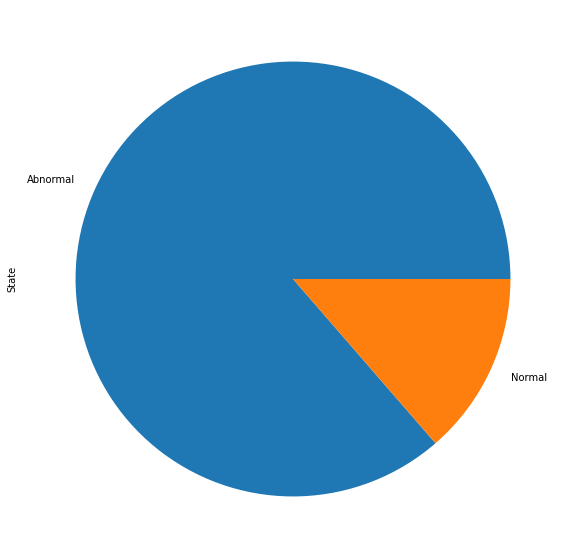

In [22]:
df['BMI'] = df['weight']/((df['height']/100)**2)

def bmi_categorize(bmi_score):
  if 18.5 <= bmi_score <= 22.9:
    return "Normal"
  else:
    return "Abnormal"
fig, ax = plt.subplots(figsize=(10, 10))
df["State"] = df["BMI"].apply(lambda x: bmi_categorize(x))
df["State"].value_counts().plot(kind='pie')

ข้อมูลนี้ให้ข้อมูลเชิงลึกอันมีค่าที่ระบุว่าผู้ที่ติดตามคะแนน BMI ปกติมักไม่ค่อยมีแนวโน้มที่จะเป็น CVD และผู้ที่มี BMI ผิดปกติจะมี CVD เพิ่มขึ้น
แต่เราต้องตรวจสอบว่ามีอาการผิดปกติอย่างไร เช่น พฤติกรรมการดื่มสุรา กิจกรรมทางกาย การสูบบุหรี่ เป็นต้น พฤติกรรมเหล่านี้ส่งผลต่อสภาวะ BMI ของผู้ป่วยอย่างไร

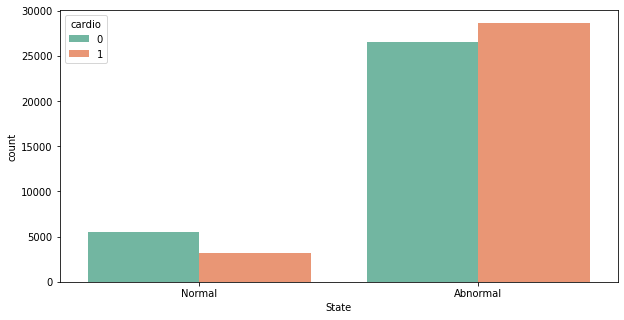

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='State', hue='cardio', data = df, palette="Set2");